# Section 1) Data extraction.

Here we extract light curves from our three energy bands, interpolate and rebin them, and derive their cross correlation functions.

No modelling is performed in this section.

In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'style'  : 'italic',
        'size'   : 15} # or 10 for triplot
matplotlib.rc('font', **font)
%matplotlib inline
import scipy.optimize
import csv
pi = np.pi

Set up binning scales in wavelength, energy and time.

In [2]:
dt_sim = 0.05
dt_dat= 0.05
dt_rebn = 0.5

taus = np.arange(-20, 20, dt_rebn)

wav_range = np.array((5468, 4392, 3465, 2600, 2246, 1928, 25.3, 4.4))
dwav_range = np.array((5800-5050, 4900-3900,3900-3050,2950-2250,2500-2000,2250-1650, 41.3-15.5, 15.5-1.2))

E_range = 12.398/wav_range
dE_range = np.array((12.398/5050 - 12.398/5800,\
            12.398/3900 - 12.398/4900,\
            12.398/3050 - 12.398/3900,
            12.398/2250 - 12.398/2950,
            12.398/2000 - 12.398/2500,
            12.398/1650 - 12.398/2250,
            12.398/15.5 - 12.398/41.3,
            12.398/1.20 - 12.398/15.5))

dE_range = dE_range/2.
dwav_range = dwav_range/2.

E_UVW1 = E_range[3]
dE_UVW1 = dE_range[3]

Extract the raw light curves, and set up time bins in each.

In [3]:
objectname = np.array(())

cadence = np.array(())

MJD_U = np.array(())
MJD_B = np.array(())
MJD_HX = np.array(())
MJD_SX = np.array(())
MJD_UVW2 = np.array(())
MJD_V = np.array(())
MJD_UVM2 = np.array(())
MJD_UVW1 = np.array(())

duration_U = np.array(())
duration_B = np.array(())
duration_HX = np.array(())
duration_SX = np.array(())
duration_UVW2 = np.array(())
duration_V = np.array(())
duration_UVM2 = np.array(())
duration_UVW1 = np.array(())

flux_U = np.array(())
flux_B = np.array(())
flux_HX = np.array(())
flux_SX = np.array(())
flux_UVW2 = np.array(())
flux_V = np.array(())
flux_UVM2 = np.array(())
flux_UVW1 = np.array(())

flux_err_U = np.array(())
flux_err_B = np.array(())
flux_err_HX = np.array(())
flux_err_SX = np.array(())
flux_err_UVW2 = np.array(())
flux_err_V = np.array(())
flux_err_UVM2 = np.array(())
flux_err_UVW1 = np.array(())

with open('raw_lightcurves/NGC4151/lcdata.csv', 'rb') as csvfile:
     data_file = csv.reader(csvfile, delimiter=',', quotechar='|')
     for row in data_file:
         if row[0] == '"NGC4151"':
             if row[1] == '"U"':
                 MJD_U = np.append(MJD_U, row[3])
                 duration_U = np.append(duration_U, row[4])
                 flux_U = np.append(flux_U, row[5])
                 flux_err_U = np.append(flux_err_U, row[6])
             elif row[1] == '"B"':
                 MJD_B = np.append(MJD_B, row[3])
                 duration_B = np.append(duration_B, row[4])
                 flux_B = np.append(flux_B, row[5])
                 flux_err_B = np.append(flux_err_B, row[6])
             elif row[1] == '"HX"':
                 MJD_HX = np.append(MJD_HX, row[3])
                 duration_HX = np.append(duration_HX, row[4])
                 flux_HX = np.append(flux_HX, row[5])
                 flux_err_HX = np.append(flux_err_HX, row[6])
             elif row[1] == '"SX"':
                 MJD_SX = np.append(MJD_SX, row[3])
                 duration_SX = np.append(duration_SX, row[4])
                 flux_SX = np.append(flux_SX, row[5])
                 flux_err_SX = np.append(flux_err_SX, row[6])
             elif row[1] == '"UVW2"':
                 MJD_UVW2 = np.append(MJD_UVW2, row[3])
                 duration_UVW2 = np.append(duration_UVW2, row[4])
                 flux_UVW2 = np.append(flux_UVW2, row[5])
                 flux_err_UVW2 = np.append(flux_err_UVW2, row[6])
             elif row[1] == '"V"':
                 MJD_V = np.append(MJD_V, row[3])
                 duration_V = np.append(duration_V, row[4])
                 flux_V = np.append(flux_V, row[5])
                 flux_err_V = np.append(flux_err_V, row[6])
             elif row[1] == '"UVM2"':
                 MJD_UVM2 = np.append(MJD_UVM2, row[3])
                 duration_UVM2 = np.append(duration_UVM2, row[4])
                 flux_UVM2 = np.append(flux_UVM2, row[5])
                 flux_err_UVM2 = np.append(flux_err_UVM2, row[6])
             elif row[1] == '"UVW1"':
                 MJD_UVW1 = np.append(MJD_UVW1, row[3])
                 duration_UVW1 = np.append(duration_UVW1, row[4])
                 flux_UVW1 = np.append(flux_UVW1, row[5])
                 flux_err_UVW1 = np.append(flux_err_UVW1, row[6])
                
bat_dat = np.genfromtxt('raw_lightcurves/NGC4151/bat.qdp', skip_header=1)
MJD_BAT = bat_dat[:,0]
flux_BAT = bat_dat[:,1]
flux_err_BAT = bat_dat[:,2]

MJD_U = MJD_U.astype('float')
duration_U = duration_U.astype('float')
flux_U = flux_U.astype('float')
flux_err_U = flux_err_U.astype('float')
dt_U = MJD_U[1:] - MJD_U[:-1]

MJD_B = MJD_B.astype('float')
duration_B = duration_B.astype('float')
flux_B = flux_B.astype('float')
flux_err_B = flux_err_B.astype('float')
dt_B = MJD_B[1:] - MJD_B[:-1]

MJD_HX = MJD_HX.astype('float')
duration_HX = duration_HX.astype('float')
flux_HX = flux_HX.astype('float')
flux_err_HX = flux_err_HX.astype('float')
dt_HX = MJD_HX[1:] - MJD_HX[:-1]

MJD_SX = MJD_SX.astype('float')
duration_SX = duration_SX.astype('float')
flux_SX = flux_SX.astype('float')
flux_err_SX = flux_err_SX.astype('float')
dt_SX = MJD_SX[1:] - MJD_SX[:-1]

MJD_UVW2 = MJD_UVW2.astype('float')
duration_UVW2 = duration_UVW2.astype('float')
flux_UVW2 = flux_UVW2.astype('float')
flux_err_UVW2 = flux_err_UVW2.astype('float')
dt_UVW2 = MJD_UVW2[1:] - MJD_UVW2[:-1]

MJD_V = MJD_V.astype('float')
duration_V = duration_V.astype('float')
flux_V = flux_V.astype('float')
flux_err_V = flux_err_V.astype('float')
dt_V = MJD_V[1:] - MJD_V[:-1]

MJD_UVM2 = MJD_UVM2.astype('float')
duration_UVM2 = duration_UVM2.astype('float')
flux_UVM2 = flux_UVM2.astype('float')
flux_err_UVM2 = flux_err_UVM2.astype('float')
dt_UVM2 = MJD_UVM2[1:] - MJD_UVM2[:-1]

MJD_UVW1 = MJD_UVW1.astype('float')
duration_UVW1 = duration_UVW1.astype('float')
flux_UVW1 = flux_UVW1.astype('float')
flux_err_UVW1 = flux_err_UVW1.astype('float')
dt_UVW1 = MJD_UVW1[1:] - MJD_UVW1[:-1]

Now we interpolate the lightcurves as they were irregularly binned.

In [4]:
comparison_times = np.arange(MJD_SX[0], MJD_SX[-1], dt_dat)
flux_BAT_int = np.interp(comparison_times, MJD_BAT, flux_BAT)
flux_U_int = np.interp(comparison_times, MJD_U, flux_U)
flux_V_int = np.interp(comparison_times, MJD_V, flux_V)
flux_B_int = np.interp(comparison_times, MJD_B, flux_B)
flux_HX_int = np.interp(comparison_times, MJD_HX, flux_HX)
flux_UVW1_int = np.interp(comparison_times, MJD_UVW1, flux_UVW1)
flux_UVW2_int = np.interp(comparison_times, MJD_UVW2, flux_UVW2)
flux_UVM2_int = np.interp(comparison_times, MJD_UVM2, flux_UVM2)
flux_SX_int = np.interp(comparison_times, MJD_SX, flux_SX)

flux_err_BAT_int = np.interp(comparison_times, MJD_BAT, flux_err_BAT)
flux_err_U_int = np.interp(comparison_times, MJD_U, flux_err_U)
flux_err_V_int = np.interp(comparison_times, MJD_V, flux_err_V)
flux_err_B_int = np.interp(comparison_times, MJD_B, flux_err_B)
flux_err_HX_int = np.interp(comparison_times, MJD_HX, flux_err_HX)
flux_err_UVW1_int = np.interp(comparison_times, MJD_UVW1, flux_err_UVW1)
flux_err_UVW2_int = np.interp(comparison_times, MJD_UVW2, flux_err_UVW2)
flux_err_UVM2_int = np.interp(comparison_times, MJD_UVM2, flux_err_UVM2)
flux_err_SX_int = np.interp(comparison_times, MJD_SX, flux_err_SX)

Now we can rebin the lightcurves to obtain a more reliable signal/noise. These are the lightcurves we will model later on.

In [5]:
bins = np.arange(MJD_SX[0], MJD_SX[-1], dt_rebn)
digitized = np.digitize(comparison_times[3:-3], bins)
comparison_times_rebn = np.asarray([comparison_times[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_BAT_rebn = np.asarray([flux_BAT_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_U_rebn = np.asarray([flux_U_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_V_rebn = np.asarray([flux_V_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_B_rebn = np.asarray([flux_B_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_HX_rebn = np.asarray([flux_HX_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_SX_rebn = np.asarray([flux_SX_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_UVW1_rebn = np.asarray([flux_UVW1_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_UVW2_rebn = np.asarray([flux_UVW2_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_UVM2_rebn = np.asarray([flux_UVM2_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])

flux_err_BAT_rebn = np.asarray([flux_err_BAT_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_U_rebn = np.asarray([flux_err_U_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_B_rebn = np.asarray([flux_err_B_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_V_rebn = np.asarray([flux_err_V_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_HX_rebn = np.asarray([flux_err_HX_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_SX_rebn = np.asarray([flux_err_SX_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_UVW1_rebn = np.asarray([flux_err_UVW1_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_UVW2_rebn = np.asarray([flux_err_UVW2_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])
flux_err_UVM2_rebn = np.asarray([flux_err_UVM2_int[3:-3][digitized == i].mean() for i in range(1, len(bins))])

Now we can plot the rebinned light curves and have a look at them.

/home/raad/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/raad/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


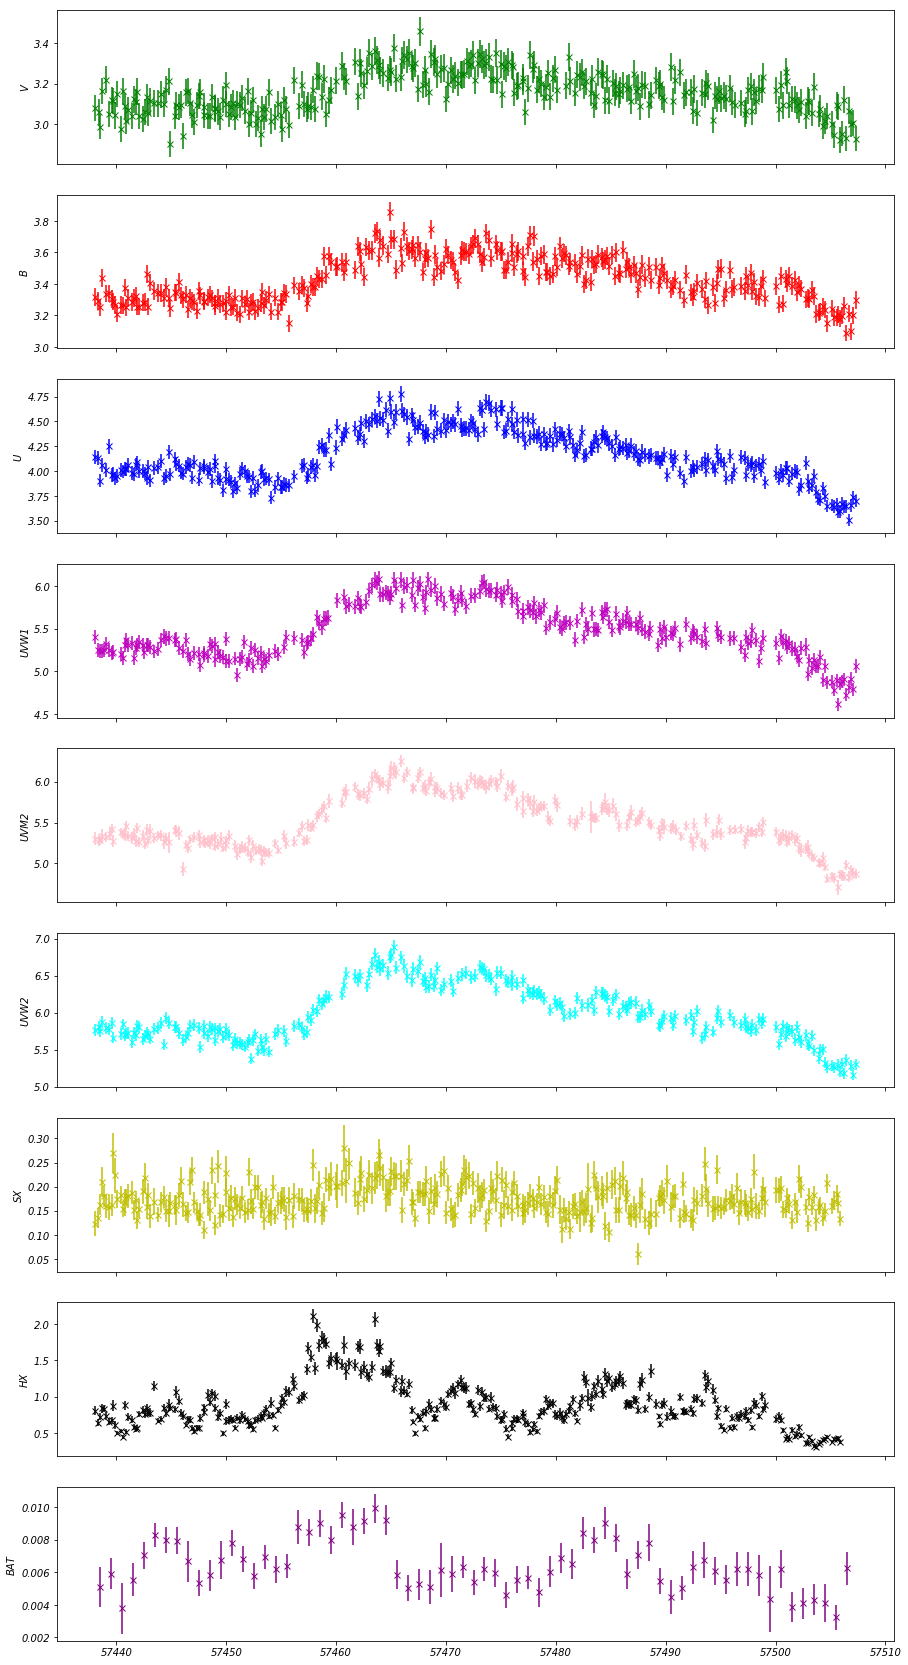

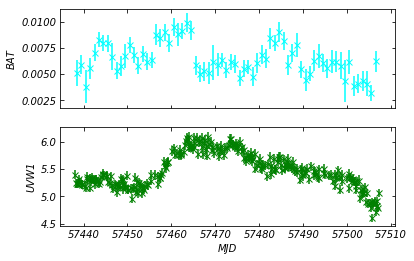

In [6]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8,ax9) = plt.subplots(9, sharex = True, figsize = (15, 30))
ax1.errorbar(MJD_V, flux_V, flux_err_V, xerr = duration_V/86400., label = 'V', c='g', ls = 'none', fmt = 'x')
ax1.set_ylabel('V')
ax2.errorbar(MJD_B, flux_B, flux_err_B, xerr = duration_B/86400., label = 'B', c='r', ls = 'none', fmt = 'x')
ax2.set_ylabel('B')
ax3.errorbar(MJD_U, flux_U, flux_err_U, xerr = duration_U/86400., label = 'U', c='b', ls = 'none', fmt = 'x')
ax3.set_ylabel('U')
ax4.errorbar(MJD_UVW1, flux_UVW1, flux_err_UVW1, xerr = duration_UVW1/86400., label = 'UVW1', c='m', ls = 'none', fmt = 'x')
ax4.set_ylabel('UVW1')
ax5.errorbar(MJD_UVM2, flux_UVM2, flux_err_UVM2, xerr = duration_UVM2/86400., label = 'UVM2', c='pink', ls = 'none', fmt = 'x')
ax5.set_ylabel('UVM2')
ax6.errorbar(MJD_UVW2, flux_UVW2, flux_err_UVW2, xerr = duration_UVW2/86400., label = 'UVW2', c='cyan', ls = 'none', fmt = 'x')
ax6.set_ylabel('UVW2')
ax7.errorbar(MJD_SX, flux_SX, flux_err_SX, xerr = duration_SX/86400., label = 'SX', c='y', ls = 'none', fmt = 'x')
ax7.set_ylabel('SX')
ax8.errorbar(MJD_HX, flux_HX, flux_err_HX, xerr = duration_HX/86400., label = 'HX', c='k', ls = 'none', fmt = 'x')
ax8.set_ylabel('HX')
ax9.errorbar(MJD_BAT, flux_BAT, flux_err_BAT, label = 'BAT', c='purple', ls = 'none', fmt = 'x')
ax9.set_ylabel('BAT')

f, (ax4, ax9) = plt.subplots(2, sharex = True)
ax9.errorbar(MJD_UVW1, flux_UVW1, flux_err_UVW1, xerr = duration_UVW1/86400., label = 'UVW1', c='green', ls = 'none', fmt = 'x')
ax9.set_ylabel('UVW1')
ax4.errorbar(MJD_BAT, flux_BAT, flux_err_BAT, label = 'BAT', c='cyan', ls = 'none', fmt = 'x')
ax4.set_ylabel('BAT')
ax9.set_xlabel('MJD')
ax4.tick_params(axis = 'both', bottom='on', top='on', left='on', right='on', direction= 'in')
ax9.tick_params(axis = 'both', bottom='on', top='on', left='on', right='on', direction= 'in')

Now we will produce cross-correlation functions (CCFs) between our UVM2 band and the other two. To do this we will define the CCF.

In [7]:
def CCF(s, h, dt, s_err = 0, h_err=0, s_int_err = 0, h_int_err = 0):  
    
    if type(s_err)==int :
        s_err = np.zeros(len(s))
    if type(h_err)==int:
        h_err = np.zeros(len(h))
    
    lens = len(s)

    corrs = np.zeros(len(taus))
    
    for j in range(len(taus)):
        tau = taus[j]
        di = int(tau/dt)
        if abs(di) < lens:
            if di > 0:
                '''Imagine s staying fixed and h 'rolling' forward by di beneath it.'''
                s_up = s[:-di]
                s_err_up = s_err[:-di]
                h_up = h[di:]
                h_err_up = h_err[di:]
            elif di == 0:
                s_up = s
                s_err_up = s_err
                h_up = h
                h_err_up = h_err
            else:
                s_up = s[abs(di):]
                s_err_up = s_err[abs(di):]
                h_up = h[:-abs(di)]
                h_err_up = h_err[:-abs(di)]     
            save = np.average(s_up)
            have = np.average(h_up)
            sig_s = np.var(s_up)
            sig_h = np.var(h_up)
            sig_s_err = np.var(s_err_up)
            sig_h_err = np.var(h_err_up)
            lens_up = len(s_up)
            
            corrs[j] = np.sum((s_up - save) * (h_up - have)) / lens_up
            corrs[j] = corrs[j] / ((sig_s * (1 - s_int_err) - sig_s_err) * (sig_h * (1-h_int_err) - sig_h_err))**0.5
        
    return corrs

We should also correct for interpolation error as in Gardner & Done 2017. This requires that we define a gaussian function and fit our raw CCF using two gaussian functions; the narrow central gaussian will be spurious, and so we can quantify the interpolation error in terms of the narrow gaussian parameters.

In [8]:
def gaussian(x, amp_A, sig2_A, amp_B, sig2_B, K):
    return amp_A / np.sqrt(2*pi*sig2_A) * np.exp( - (x)**2 / (2*sig2_A)) + amp_B / np.sqrt(2*pi*sig2_B) * np.exp( - (x)**2 / (2*sig2_B)) + K

def CCF_corrected(s, h, dt, s_err, h_err, mode = 'corr'):
    if mode == 'corr':
        ACF_s = CCF(s, s, dt_rebn, s_err, s_err)
        params_s = scipy.optimize.curve_fit(gaussian,taus,ACF_s, maxfev = 50000)[0]
        
        ACF_h = CCF(h, h, dt_rebn, h_err, h_err)
        params_h = scipy.optimize.curve_fit(gaussian,taus,ACF_h, maxfev = 50000)[0]
        
        sig2_e_s_rat = min(params_s[1], params_s[3]) / max(params_s[1], params_s[3])
        sig2_e_h_rat = min(params_h[1], params_h[3]) / max(params_h[1], params_h[3])
    
        CCF_corr = CCF(s, h, dt, s_err, h_err, sig2_e_s_rat, sig2_e_h_rat)
    if mode == 'nocorr':
        CCF_corr = CCF(s, h, dt, s_err, h_err)        

    return CCF_corr[::-1]


Now we can plot the corrected CCFs of our data and compare them.

/home/raad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/raad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Text(0,0.5,'normalised CCF')

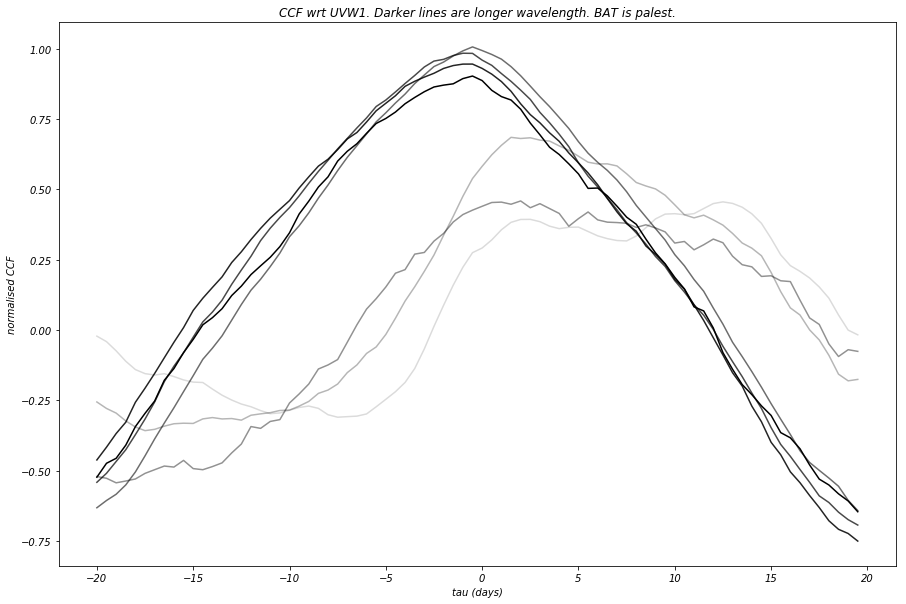

In [9]:
CCF_SX = CCF_corrected(flux_UVW1_rebn, flux_SX_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_SX_rebn)
CCF_HX = CCF_corrected(flux_UVW1_rebn, flux_HX_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_HX_rebn)
CCF_UVW2 = CCF_corrected(flux_UVW1_rebn, flux_UVW2_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_UVW2_rebn)
CCF_UVM2 = CCF_corrected(flux_UVW1_rebn, flux_UVM2_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_UVM2_rebn)
CCF_V = CCF_corrected(flux_UVW1_rebn, flux_V_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_V_rebn)
CCF_B = CCF_corrected(flux_UVW1_rebn, flux_B_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_B_rebn)
CCF_U = CCF_corrected(flux_UVW1_rebn, flux_U_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_U_rebn)
CCF_BAT = CCF_corrected(flux_UVW1_rebn, flux_BAT_rebn, dt_rebn, flux_err_UVW1_rebn, flux_err_BAT_rebn)

f, ax = plt.subplots(figsize=  (15,10))
ax.plot(taus, CCF_BAT, c = 'k', alpha = 1/7.)
ax.plot(taus, CCF_HX, c = 'k', alpha = 2/7.)
ax.plot(taus, CCF_SX, c = 'k', alpha = 3/7.)
ax.plot(taus, CCF_UVM2, c = 'k', alpha = 4/7.)
ax.plot(taus, CCF_U, c = 'k', alpha = 5/7.)
ax.plot(taus, CCF_B, c = 'k', alpha = 6/7.)
ax.plot(taus, CCF_V, c = 'k' , alpha = 7/7.)
ax.set_title('CCF wrt UVW1. Darker lines are longer wavelength. BAT is palest.')
ax.set_xlabel('tau (days)')
ax.set_ylabel('normalised CCF')

In [11]:
import os
N_r = 10
pi = np.pi
c = 29979245800.          # cm / s
M_sol =  1.989e33         #g Solar mass
G = 6.6743e-8             #cm3 g-1 s-2
a = 0.  #------------Dimensionless spin parameter
incl = 53.13/180. * pi
m_p = 1.6726219 * 10**-24
sig_T = 6.6524 * 10**-25
k_B = 1.38064852 * 10**-16
keV = 1.60218e-12 * 10**3.

r_SH = 90.1314
r_i = 6.
f_irr = 1.
sig_SB = 5.6704 * 10**-5
hx = 10.
h_disc = 0.01

Mpc = 3.086e24 # cm
D = 19 * Mpc
logmdot = -1.86505
M_bh_M_sol = 4. * 10**7
M_bh = M_bh_M_sol * M_sol #g -------- Black hole mass.
R_g = G*M_bh /c**2

Mdotedd = 10**logmdot
alpha=0.1
logrout=5.
r_out=10**5

r_DS = 390.


import scipy
import xspec

xspec.AllModels.initpackage("agnmodel", "lmodel_agnsed.dat", "/home/raad/PhD/Data/Work_Dir/agnsed")
xspec.AllModels.lmod("agnmodel", "/home/raad/PhD/Data/Work_Dir/agnsed")

os.chdir("/home/raad//xspec_placeholder_data")

s = xspec.Spectrum("source_c20.pi")

m = xspec.Model("agnsed")

xspec.Xset.abund = "grsa"
xspec.Xset.cosmo = "70 0 0.73"

xspec.AllData.dummyrsp(1e-5,1e3,10000)
xspec.Xset.xsect = "bcmc"

OSError: [Errno 2] No such file or directory: '../xspec_placeholder_data'